In [ ]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
from prophet import Prophet

In [3]:
df= pd.read_csv( "/content/Data Set Question 3.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882 entries, 0 to 5881
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5882 non-null   object 
 1   Price   5882 non-null   float64
 2   LAG1    5882 non-null   float64
 3   LAG2    5882 non-null   float64
 4   LAG3    5882 non-null   float64
 5   LAG4    5882 non-null   float64
 6   LAG5    5882 non-null   float64
 7   MA5     5882 non-null   float64
 8   MA10    5882 non-null   float64
 9   MA20    5882 non-null   float64
dtypes: float64(9), object(1)
memory usage: 459.7+ KB


In [4]:
df['DateTime']=pd.to_datetime(df['Date'])

In [5]:
df1 = df.dropna()
df1.shape

(5882, 11)

In [6]:
split_date ='2018-10-09'
df_training = df1.loc[df['DateTime'] <= split_date]
df_test = df1.loc[df['DateTime'] > split_date]

In [7]:
df_training = df_training.rename(columns={'DateTime': 'ds','Price': 'y'})

In [8]:
m = Prophet(growth='linear', interval_width=0.95)
m = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m.add_seasonality(name='daily', period=1, fourier_order=8)

In [9]:
m.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [10]:
forecast = m.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4249,2018-10-03,3.146443,2.340748,4.022506
4250,2018-10-04,3.139023,2.363277,3.953825
4251,2018-10-05,3.149546,2.328876,3.974048
4252,2018-10-08,3.191353,2.339522,3.999377
4253,2018-10-09,3.198645,2.355345,3.977980


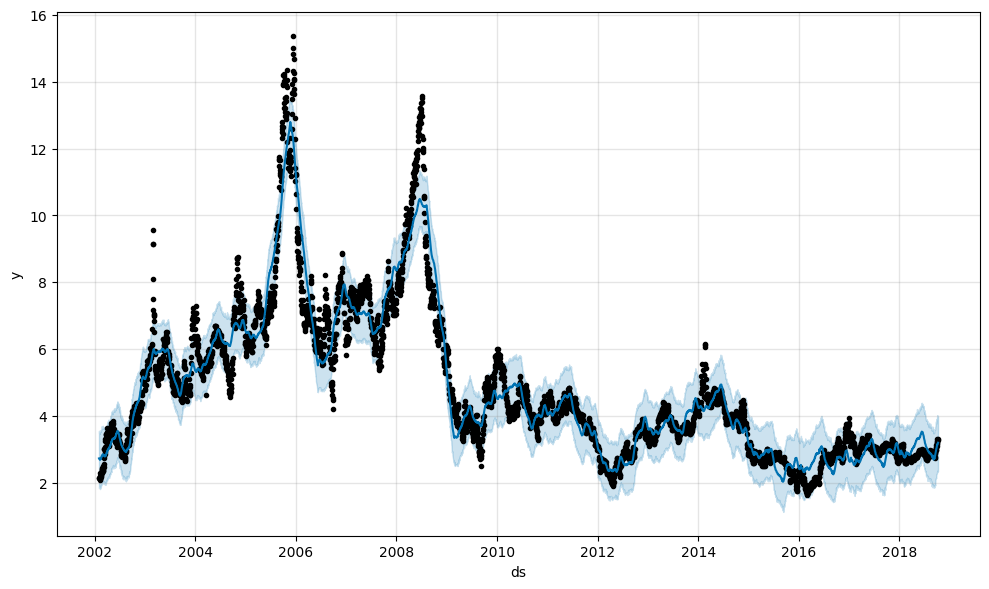

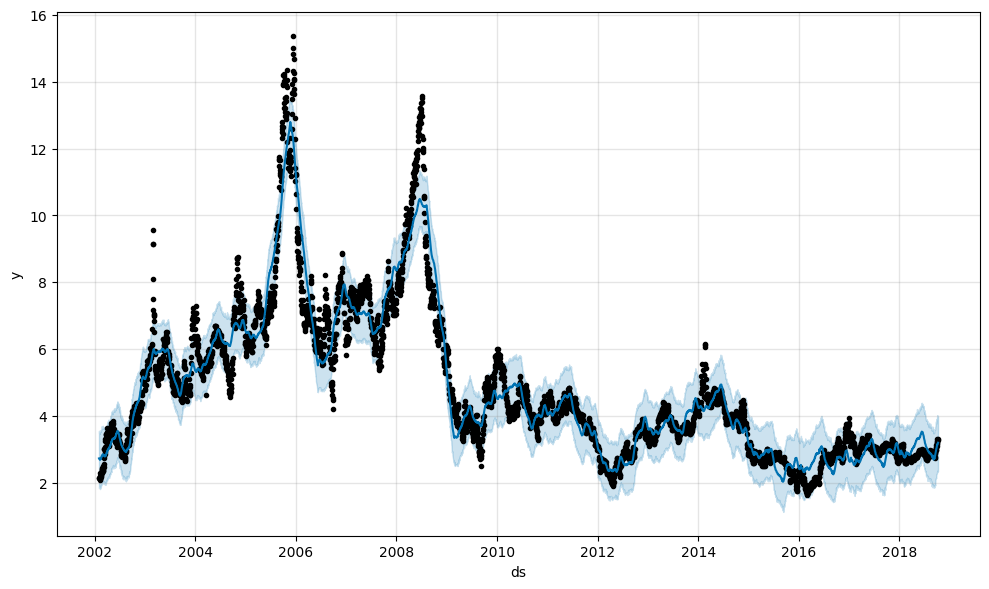

In [11]:
m.plot(forecast)

In [12]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.95944181


In [13]:
df_test = df_test.rename(columns={'Date': 'ds','Price': 'y'})

In [14]:
forecast2 = m.predict(df_test.drop(columns="y"))

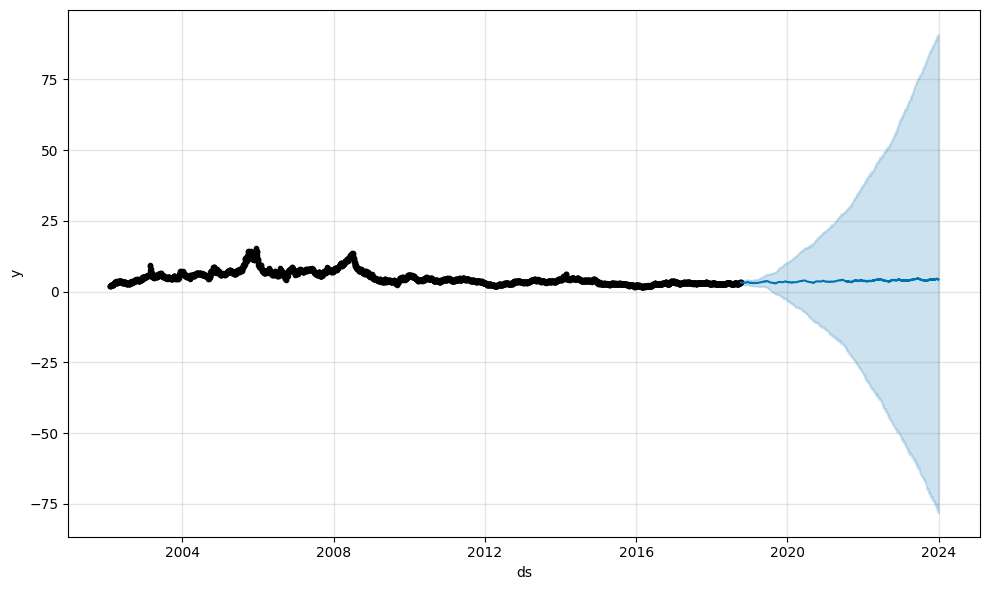

In [15]:
fig=m.plot(forecast2)

In [16]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.38852973


In [17]:
df_training["add1"] = df1['LAG1']
df_training["add2"]= df1['LAG2']
df_training["add3"]= df1['LAG3']
df_training["add4"]=df1['LAG4']
df_training["add5"]=df1['LAG5']
df_training["add6"]= df1['MA5']
df_training["add7"]=df1['MA10']
df_training["add8"]=df1['MA20']

In [18]:
m2 = Prophet(growth='linear', interval_width=0.95)
m2 = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m2.add_seasonality(name='daily', period=1, fourier_order=8)
m2.add_regressor('add1')
m2.add_regressor('add2')
m2.add_regressor('add3')
m2.add_regressor('add4')
m2.add_regressor('add5')
m2.add_regressor('add6')
m2.add_regressor('add7')
m2.add_regressor('add8')

In [19]:
m2.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [20]:
forecast = m2.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4249,2018-10-03,3.280841,3.034572,3.518873
4250,2018-10-04,3.300636,3.075208,3.529421
4251,2018-10-05,3.246318,3.006445,3.477402
4252,2018-10-08,3.205796,2.984524,3.437056
4253,2018-10-09,3.311336,3.087798,3.563737


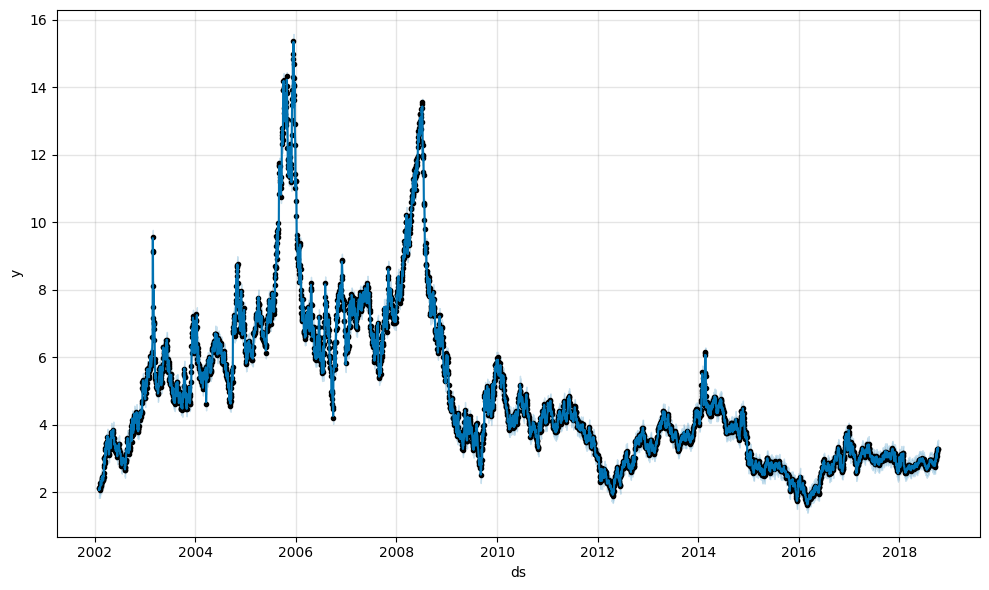

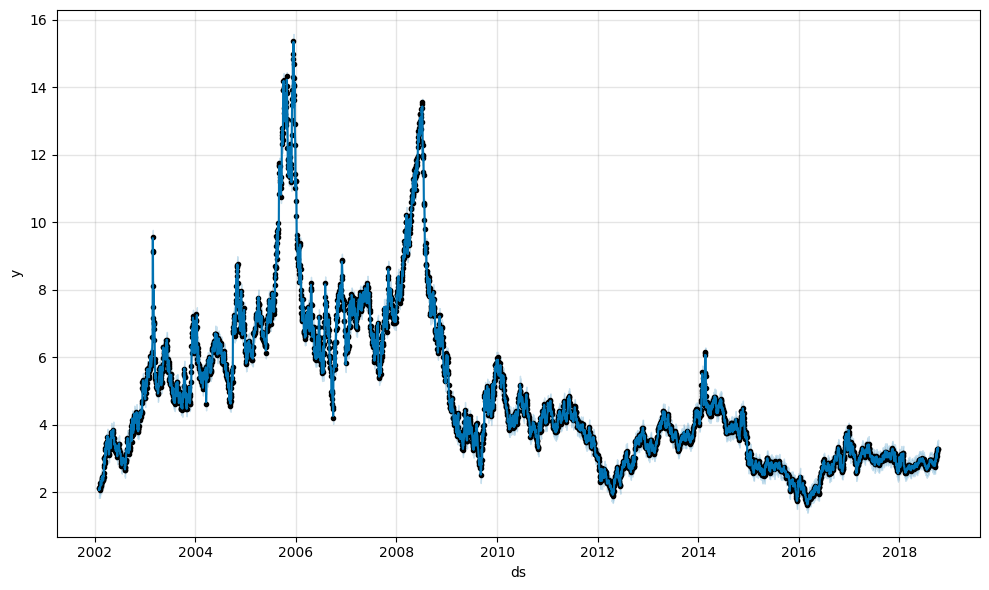

In [21]:
m2.plot(forecast)

In [22]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.99683892


In [23]:
df_test["add1"] = df1['LAG1']
df_test["add2"]= df1['LAG2']
df_test["add3"]= df1['LAG3']
df_test["add4"]=df1['LAG4']
df_test["add5"]=df1['LAG5']
df_test["add6"]= df1['MA5']
df_test["add7"]=df1['MA10']
df_test["add8"]=df1['MA20']

In [24]:
forecast2 = m2.predict(df_test.drop(columns="y"))

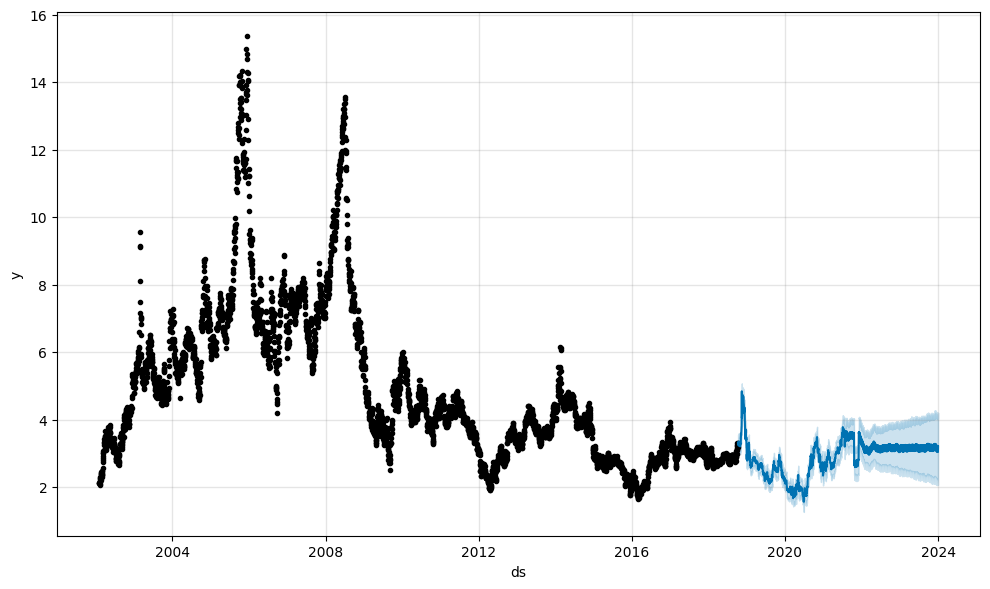

In [25]:
fig=m2.plot(forecast2)

In [26]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.98615276


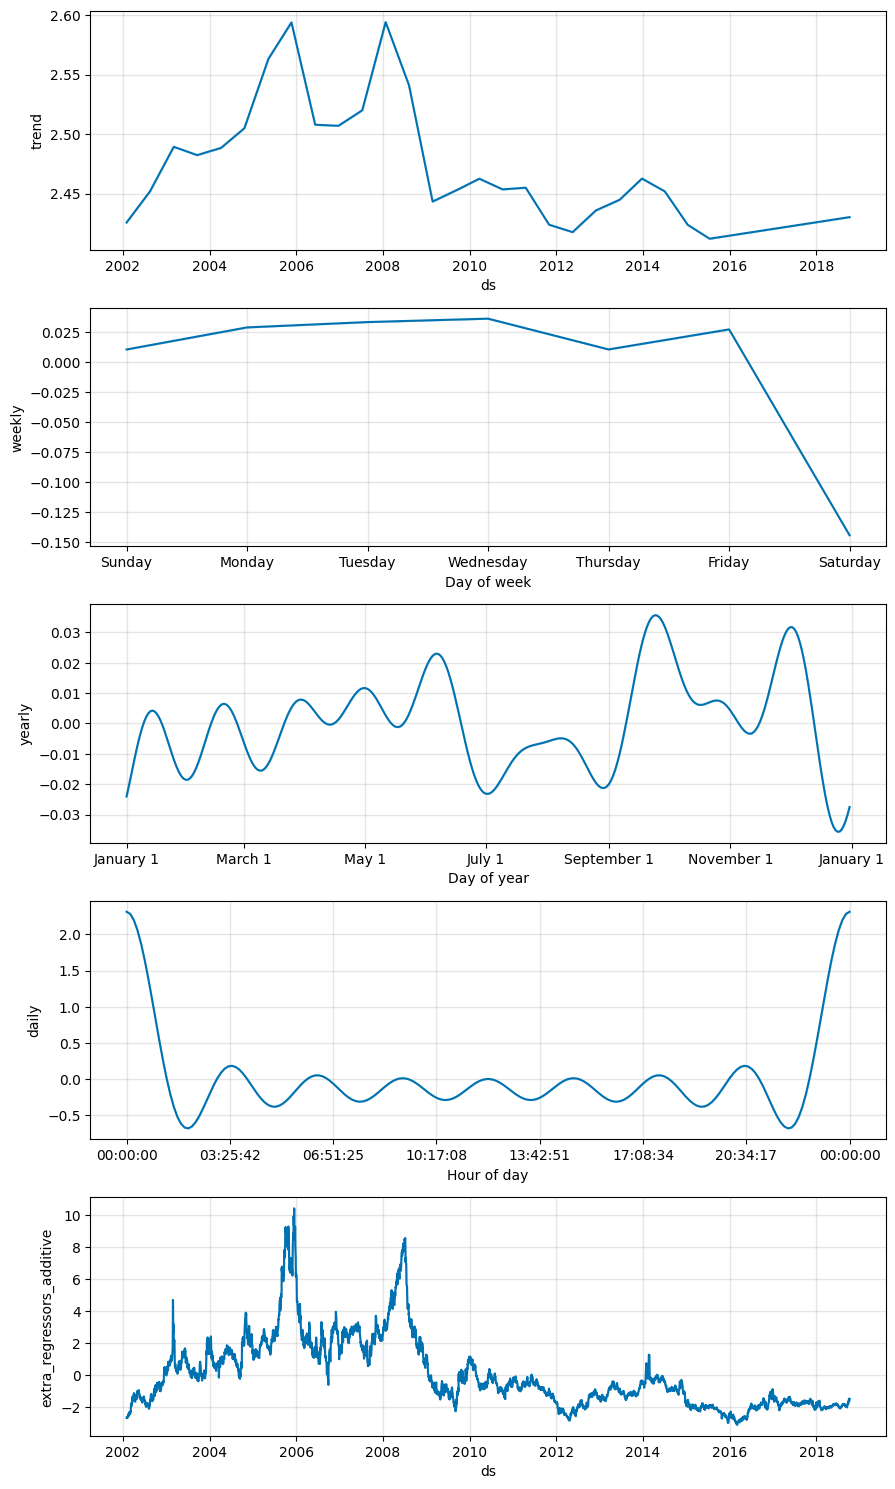

In [27]:
fig2 = m2.plot_components(forecast)

In [28]:
g2=pd.DataFrame(forecast2[['yhat']])
g2.to_csv('C:\\Users\\Document\\Predictions2367.csv')

In [29]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['y'], forecast2['yhat'])
print("Mean Square Error:\n")
print(mse)
rsme = math.sqrt(mse)
print("\nRoot Mean Square Error:\n")
print(rsme)
corr_matrix = np.corrcoef(df_test['y'], forecast2['yhat'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n R Square:\n")
print(R_sq)

Mean Square Error:

0.0072357601320060935

Root Mean Square Error:

0.08506327134554663

 R Square:

0.9724972743036275
